In [1]:
### Свёрточная нейронная сеть для классификации рукописных цифр ###

In [ ]:
#Введём свёрточную нейросеть 

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same',
                       input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [ ]:
# Загружаем данные из MNIST

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
print('Photos shape is', train_images.shape[1:])
print('Train images number is', train_images.shape[0])
print('Test images number is', test_images.shape[0])

Photos shape is (28, 28)
Train images number is 60000
Test images number is 10000


In [ ]:
#Нормализуем обучаюищие данные

In [6]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

In [ ]:
#Нормализуем тестовые данные

In [7]:
test_images = test_images.reshape((10000, 28, 28, 1))
test_imgaes = test_images.astype('float32')/255

In [ ]:
#Представим категорию цифры с помощью ряда единицы и нулей 

In [8]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
#Компиляция и обучение модели

In [10]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data = (test_images, test_labels))

Epoch 1/5
938/938 [==============================] - 47s 50ms/step - loss: 0.1389 - accuracy: 0.9566 - val_loss: 5.3272 - val_accuracy: 0.9896
Epoch 2/5
938/938 [==============================] - 61s 65ms/step - loss: 0.0410 - accuracy: 0.9873 - val_loss: 6.7992 - val_accuracy: 0.9894
Epoch 3/5
938/938 [==============================] - 67s 71ms/step - loss: 0.0278 - accuracy: 0.9913 - val_loss: 7.2611 - val_accuracy: 0.9905
Epoch 4/5
938/938 [==============================] - 64s 68ms/step - loss: 0.0214 - accuracy: 0.9933 - val_loss: 9.9428 - val_accuracy: 0.9875
Epoch 5/5
938/938 [==============================] - 63s 68ms/step - loss: 0.0169 - accuracy: 0.9949 - val_loss: 9.6992 - val_accuracy: 0.9895


In [ ]:
#Визуализация динамики обучения с течением эпох

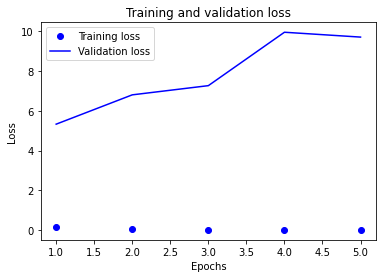

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs=range(1, len(history_dict['accuracy'])+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

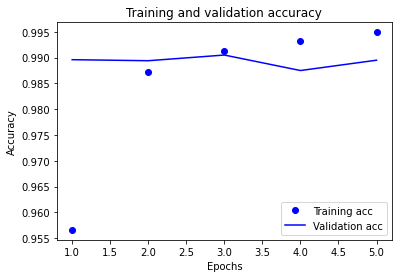

In [13]:
plt.clf()
acc_values=history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show